In [1]:
import warnings
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from tqdm.auto import tqdm
import qgrid
import re

sns.set(style="ticks", palette="muted", color_codes=True)

warnings.filterwarnings("ignore")

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

In [2]:
def show_tbl(df):
    return qgrid.showgrid(df, show_toolbar=True)

In [3]:
df = pd.read_csv("Combined_all_air_pollut_types&coords.csv", parse_dates=['DATE'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542322 entries, 0 to 542321
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATE                    542322 non-null  datetime64[ns]
 1   POLSTID                 542322 non-null  object        
 2   Voivodeship             542322 non-null  object        
 3   City                    542322 non-null  object        
 4   county                  542322 non-null  object        
 5   postcode                542322 non-null  object        
 6   LAT                     542322 non-null  float64       
 7   LON                     542322 non-null  float64       
 8   NO2_24H_AVG_POLLUTION   5035 non-null    float64       
 9   O3_24H_AVG_POLLUTION    184172 non-null  float64       
 10  PM10_24H_AVG_POLLUTION  303605 non-null  float64       
 11  PM25_24H_AVG_POLLUTION  113597 non-null  float64       
dtypes: datetime64[ns](1), float64(

In [5]:
df.isnull().sum()

DATE                           0
POLSTID                        0
Voivodeship                    0
City                           0
county                         0
postcode                       0
LAT                            0
LON                            0
NO2_24H_AVG_POLLUTION     537287
O3_24H_AVG_POLLUTION      358150
PM10_24H_AVG_POLLUTION    238717
PM25_24H_AVG_POLLUTION    428725
dtype: int64

In [6]:
df.columns

Index(['DATE', 'POLSTID', 'Voivodeship', 'City', 'county', 'postcode', 'LAT',
       'LON', 'NO2_24H_AVG_POLLUTION', 'O3_24H_AVG_POLLUTION',
       'PM10_24H_AVG_POLLUTION', 'PM25_24H_AVG_POLLUTION'],
      dtype='object')

In [7]:
for col in ['POLSTID', 'Voivodeship', 'City', 'county', 'postcode']:
    print(f"{col} : Total unique categories: {len(set(df[col]))}")

POLSTID : Total unique categories: 297
Voivodeship : Total unique categories: 16
City : Total unique categories: 225
county : Total unique categories: 197
postcode : Total unique categories: 271


Number of stations that does not record PM10 pollutant = 66


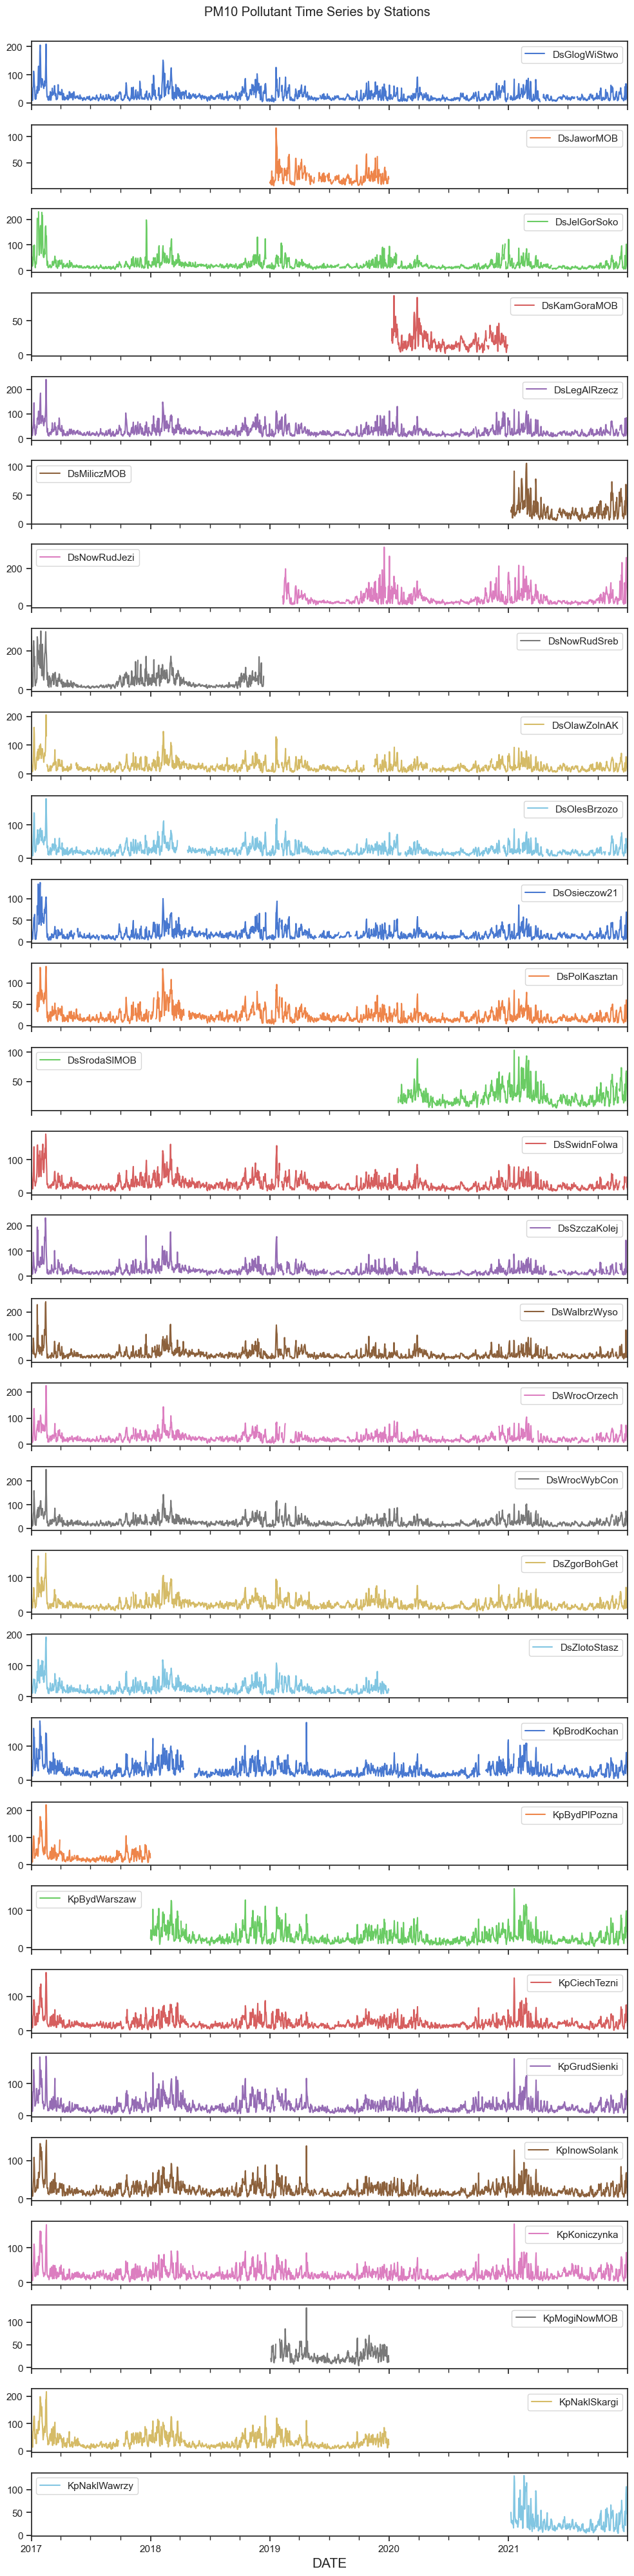

In [8]:
pm10_null_stations = \
df.groupby('POLSTID')['PM10_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['PM10_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record PM10 pollutant = {len(pm10_null_stations)}')

df.loc[~df['POLSTID'].isin(pm10_null_stations)].\
    groupby(['POLSTID', 'DATE'])['PM10_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle("PM10 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

Number of stations that does not record NO2 pollutant = 294


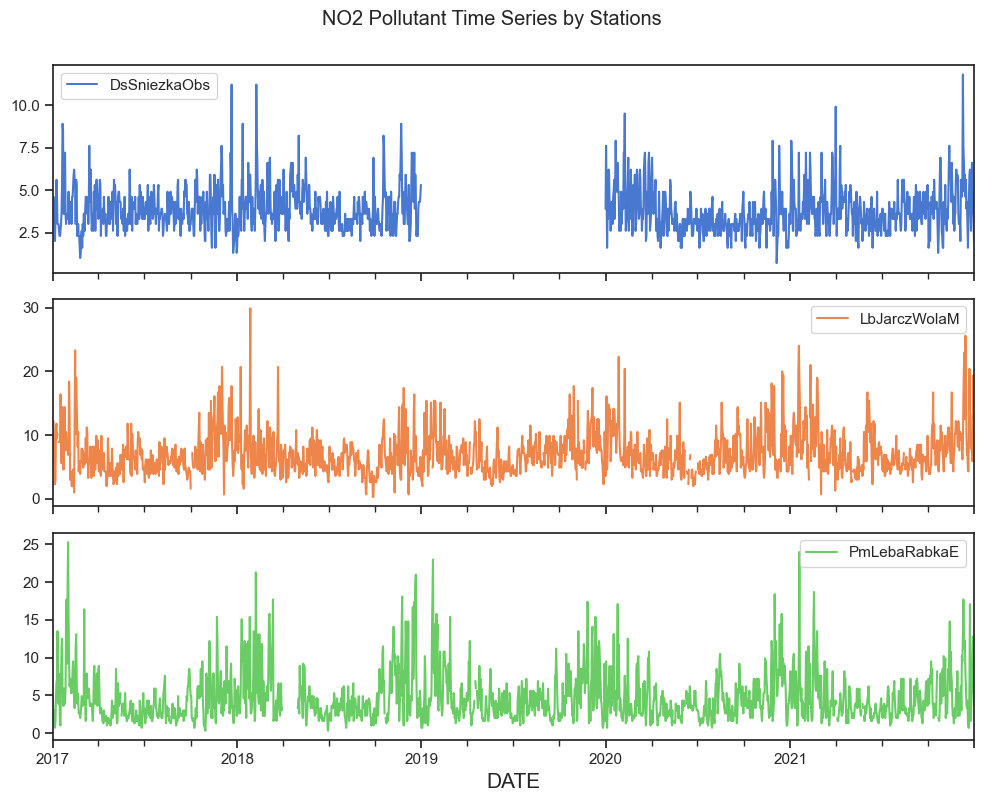

In [9]:
no2_null_stations = \
df.groupby('POLSTID')['NO2_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['NO2_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record NO2 pollutant = {len(no2_null_stations)}')

df.loc[~df['POLSTID'].isin(no2_null_stations)].\
    groupby(['POLSTID', 'DATE'])['NO2_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').plot(subplots=True, figsize=(10, 8));

plt.suptitle("NO2 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

Number of stations that does not record O3 pollutant = 172


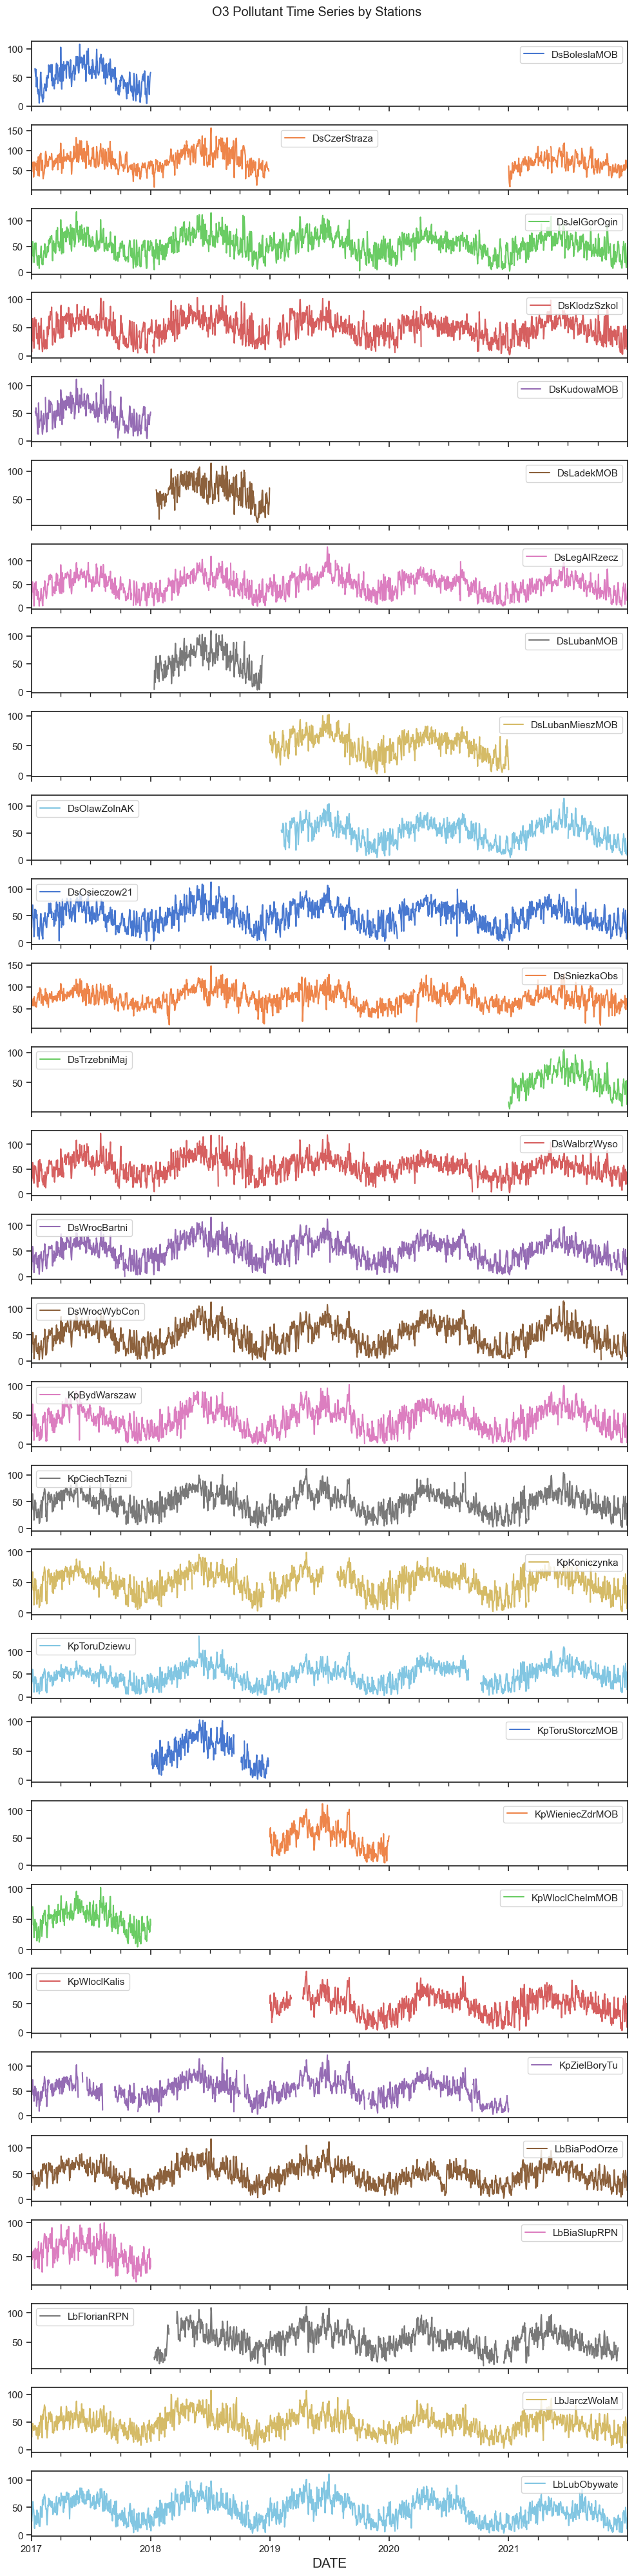

In [10]:
o3_null_stations = \
df.groupby('POLSTID')['O3_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['O3_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record O3 pollutant = {len(o3_null_stations)}')

df.loc[~df['POLSTID'].isin(o3_null_stations)].\
    groupby(['POLSTID', 'DATE'])['O3_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle("O3 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

Number of stations that does not record PM25 pollutant = 217


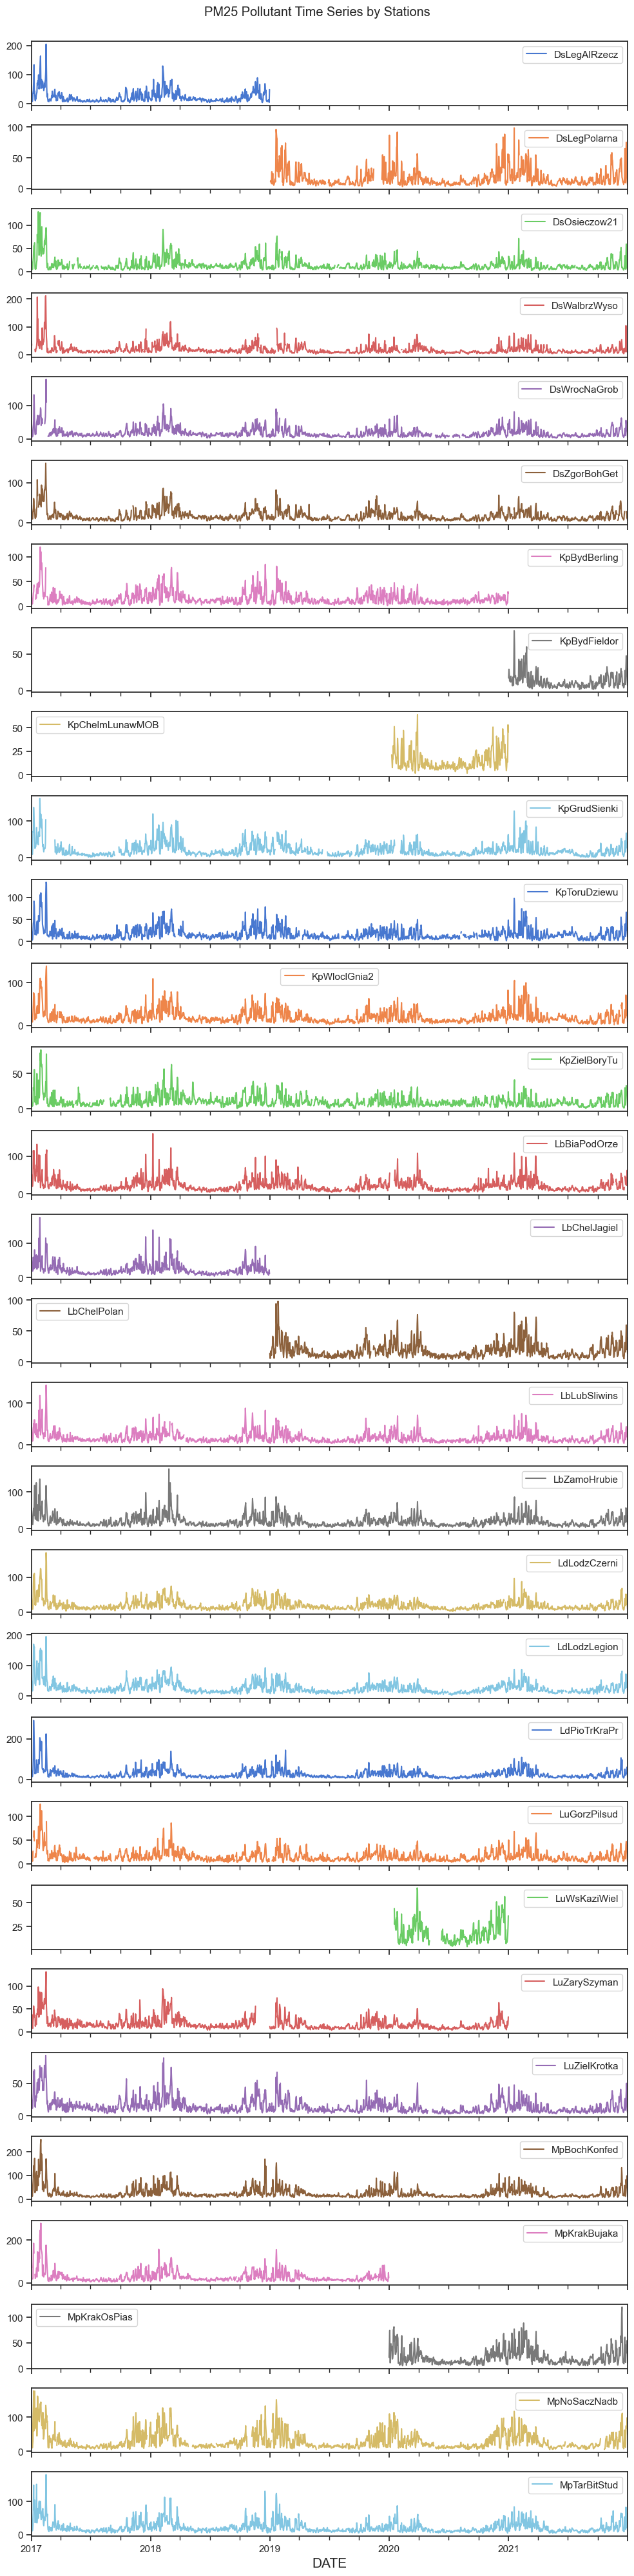

In [11]:
pm25_null_stations = \
df.groupby('POLSTID')['PM25_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['PM25_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record PM25 pollutant = {len(pm25_null_stations)}')

df.loc[~df['POLSTID'].isin(pm25_null_stations)].\
    groupby(['POLSTID', 'DATE'])['PM25_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle("PM25 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

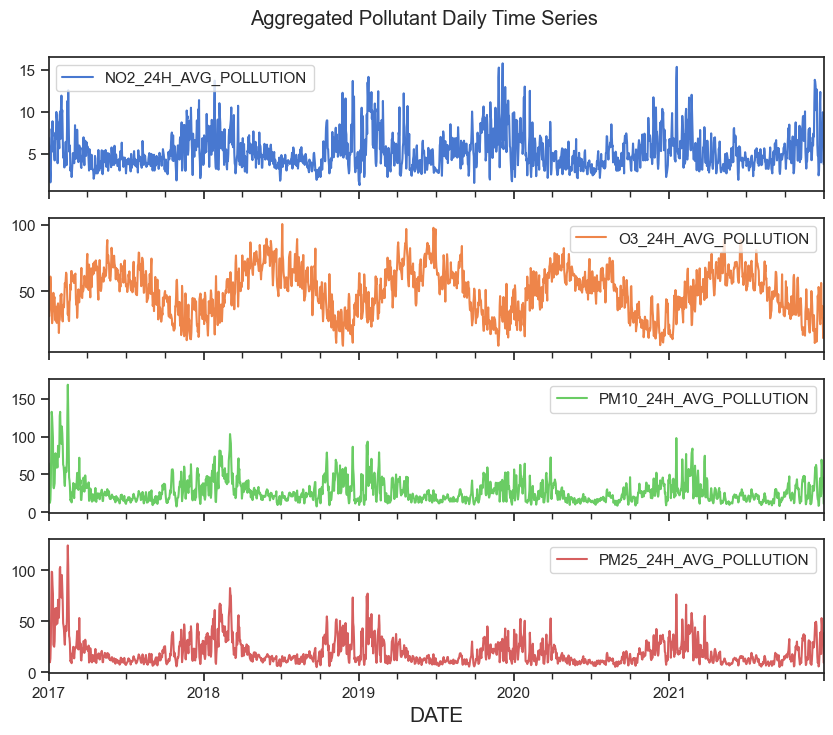

In [12]:
df.groupby('DATE')[[
    'NO2_24H_AVG_POLLUTION', 
    'O3_24H_AVG_POLLUTION', 
    'PM10_24H_AVG_POLLUTION', 
    'PM25_24H_AVG_POLLUTION'
]].mean().plot(subplots=True, figsize=(10, 8));

plt.suptitle("Aggregated Pollutant Daily Time Series",  y=0.94);

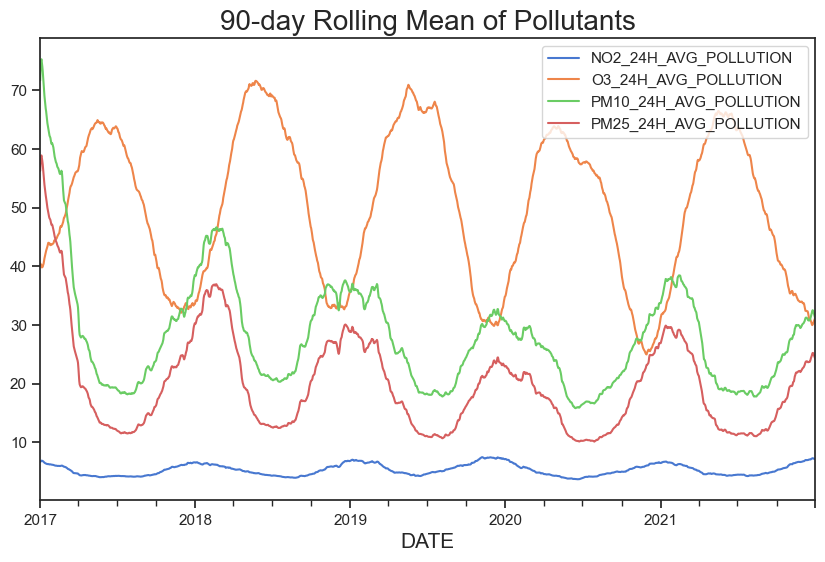

In [13]:
df.groupby('DATE')[[
    'NO2_24H_AVG_POLLUTION', 
    'O3_24H_AVG_POLLUTION', 
    'PM10_24H_AVG_POLLUTION', 
    'PM25_24H_AVG_POLLUTION'
]].mean().rolling(90, center=True, min_periods=30).mean().\
    plot(figsize=(10, 6), title = "90-day Rolling Mean of Pollutants");

In [14]:
df['day'] = df['DATE'].dt.day
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['dayofweek'] = df['DATE'].dt.dayofweek

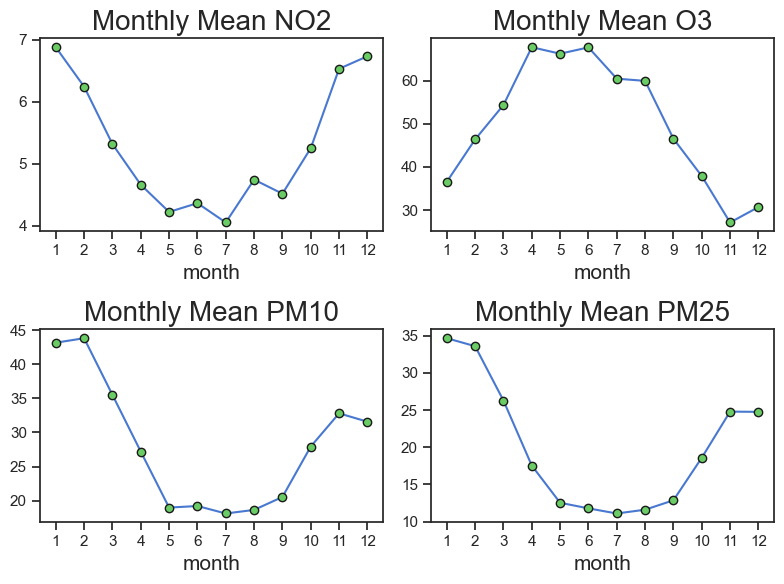

In [15]:
pollutant_cols = ['NO2_24H_AVG_POLLUTION', 'O3_24H_AVG_POLLUTION', 'PM10_24H_AVG_POLLUTION', 
                  'PM25_24H_AVG_POLLUTION']

fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6))

for col, ax in zip(pollutant_cols, axes.flatten()):
    
    df.groupby('month')[col].mean().plot(ax=ax, marker="o", mfc="g", mec="k")
    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_title(f'Monthly Mean {col.split("_")[0]}');

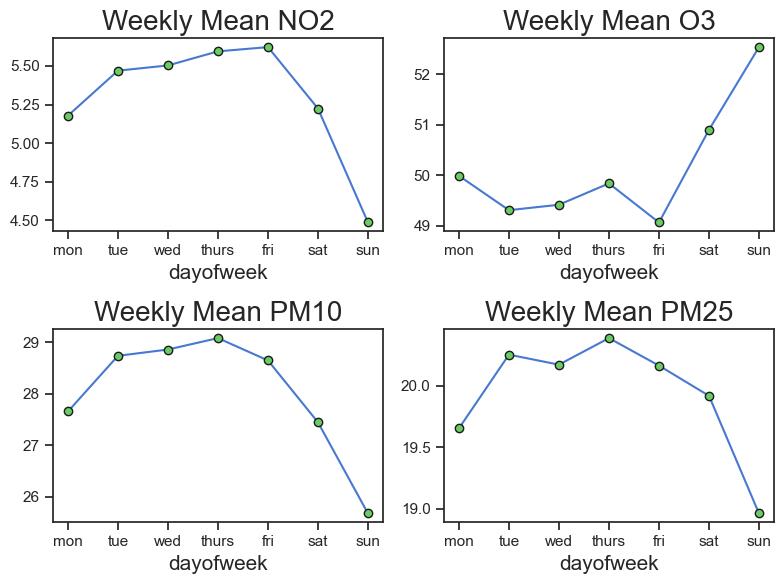

In [16]:
days=["mon", "tue", "wed", "thurs", "fri", "sat", "sun"]

fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6))

for col, ax in zip(pollutant_cols, axes.flatten()):
    
    df.groupby('dayofweek')[col].mean().plot(ax=ax, marker="o", mfc="g", mec="k")
    ax.set_xticks(np.arange(7), days)
    ax.set_title(f'Weekly Mean {col.split("_")[0]}');

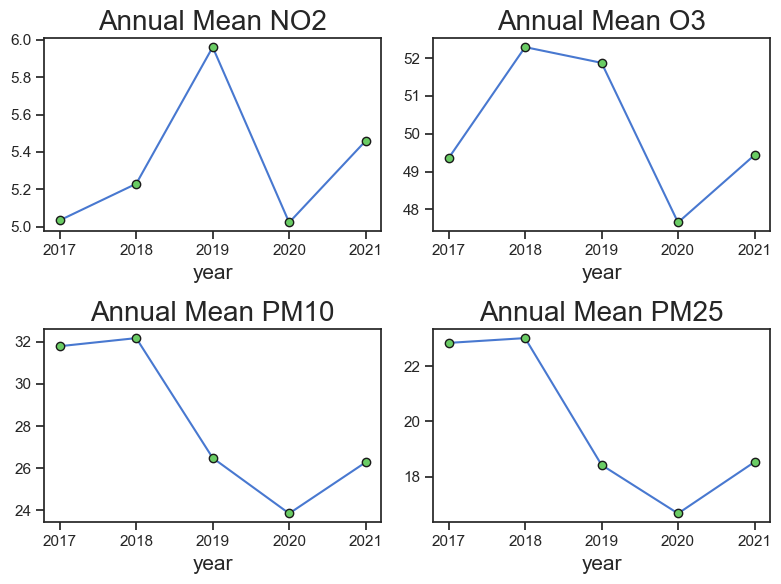

In [17]:
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6))

for col, ax in zip(pollutant_cols, axes.flatten()):
    
    df.groupby('year')[col].mean().plot(ax=ax, marker="o", mfc="g", mec="k")
    ax.set_title(f'Annual Mean {col.split("_")[0]}');

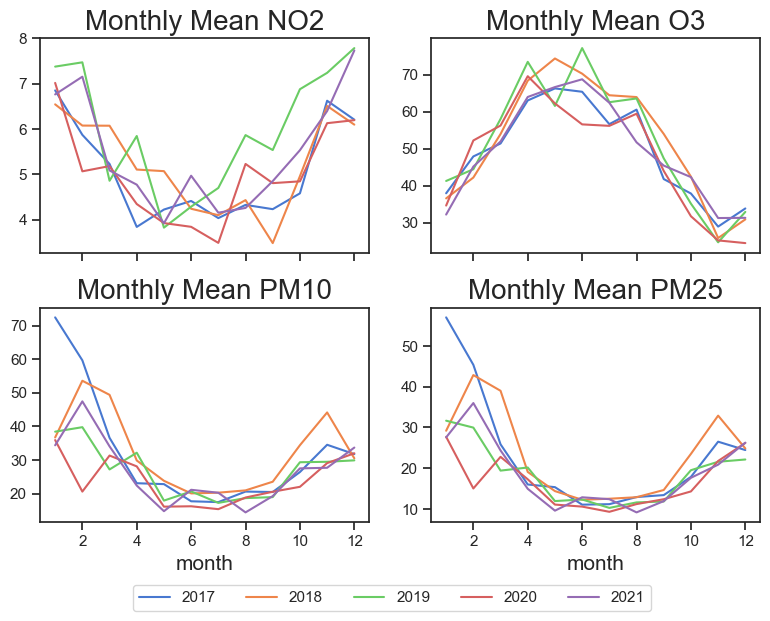

In [18]:
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6), sharex=True)

for col, ax in zip(pollutant_cols, axes.flatten()):
    df.groupby(['year', 'month'])[pollutant_cols].mean().unstack('year')[col].\
        plot(ax=ax, title=f"Monthly Mean {col.split('_')[0]}", legend=None)
    
fig.legend(labels=df['year'].unique(), loc='center', bbox_to_anchor=(0.5,-0.01), ncol=5, 
           bbox_transform=fig.transFigure);

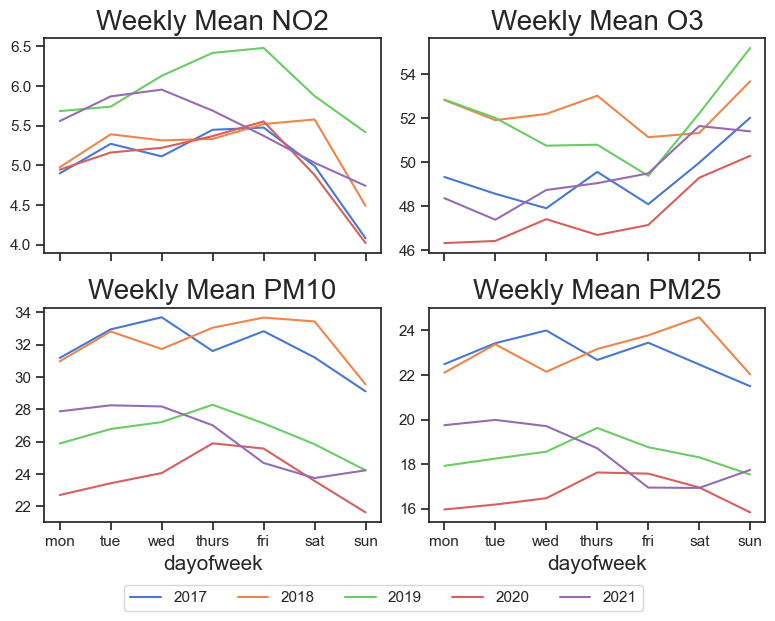

In [19]:
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6), sharex=True)

for col, ax in zip(pollutant_cols, axes.flatten()):
    df.groupby(['year', 'dayofweek'])[pollutant_cols].mean().unstack('year')[col].\
        plot(ax=ax, title=f"Weekly Mean {col.split('_')[0]}", legend=None)
    
    ax.set_xticks(np.arange(7), days)
    
fig.legend(labels=df['year'].unique(), loc='center', bbox_to_anchor=(0.5,-0.01), ncol=5, 
           bbox_transform=fig.transFigure);

# NO2

In [20]:
no2_stations=\
df.loc[~df['POLSTID'].isin(no2_null_stations)].\
    groupby(['POLSTID', 'DATE'])['NO2_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID')

no2_stations.index.freq='D'

In [21]:
no2_stations.isna().sum()

POLSTID
DsSniezkaObs    365
LbJarczWolaM     34
PmLebaRabkaE     44
dtype: int64

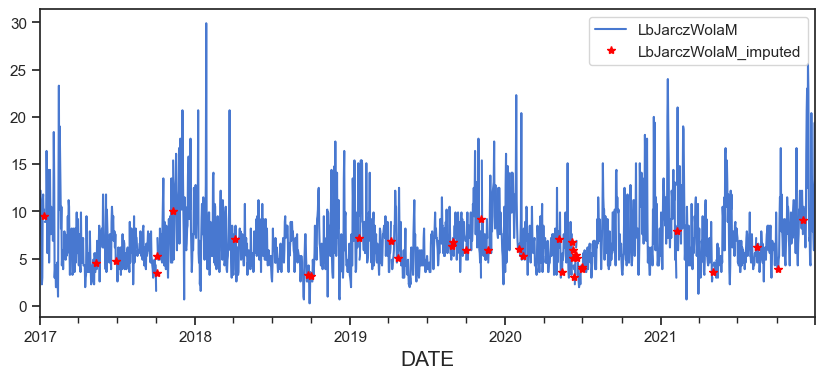

In [22]:
no2_stations['LbJarczWolaM_imputed']=\
no2_stations['LbJarczWolaM'].interpolate('linear')


ax=no2_stations['LbJarczWolaM'].plot(figsize=(10, 4))

no2_stations.loc[no2_stations['LbJarczWolaM'].isna(), 'LbJarczWolaM_imputed'].\
    plot(linestyle='', marker='*', c='red', ax=ax, label='LbJarczWolaM_imputed');

ax.legend();

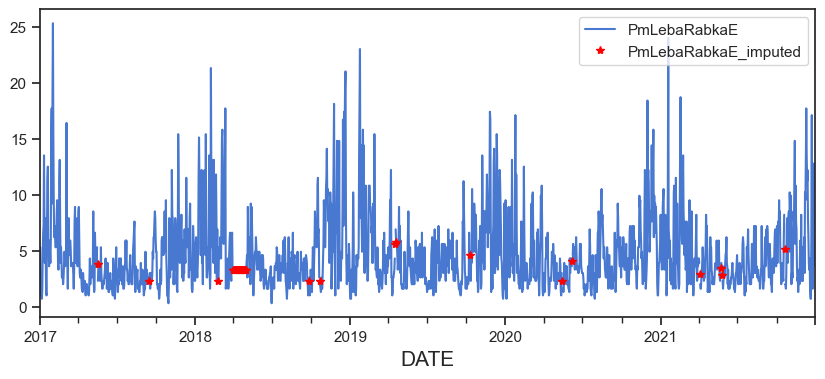

In [23]:
no2_stations['PmLebaRabkaE_imputed']=\
no2_stations['PmLebaRabkaE'].interpolate('linear')


ax=no2_stations['PmLebaRabkaE'].plot(figsize=(10, 4))

no2_stations.loc[no2_stations['PmLebaRabkaE'].isna(), 'PmLebaRabkaE_imputed'].\
    plot(linestyle='', marker='*', c='red', ax=ax, label='PmLebaRabkaE_imputed');

ax.legend();

# Imputation using MSTL 


Github repo that provides information on STL/MSTL [trainindata Github Repo](https://github.com/trainindata/feature-engineering-for-time-series-forecasting/blob/main/05-Missing-Data/03-impute-missing-data-using-STL-decomposition-and-interpolation.ipynb)

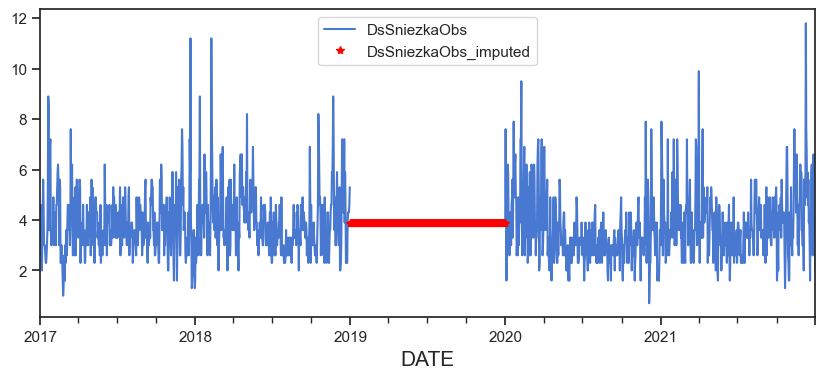

In [24]:
#Initial imputation
no2_stations['DsSniezkaObs_first_impute']=\
no2_stations['DsSniezkaObs'].bfill()

ax=no2_stations['DsSniezkaObs'].plot(figsize=(10, 4))

no2_stations.loc[no2_stations['DsSniezkaObs'].isna(), 'DsSniezkaObs_first_impute'].\
    plot(linestyle='', marker='*', c='red', ax=ax, label='DsSniezkaObs_imputed');

ax.legend();

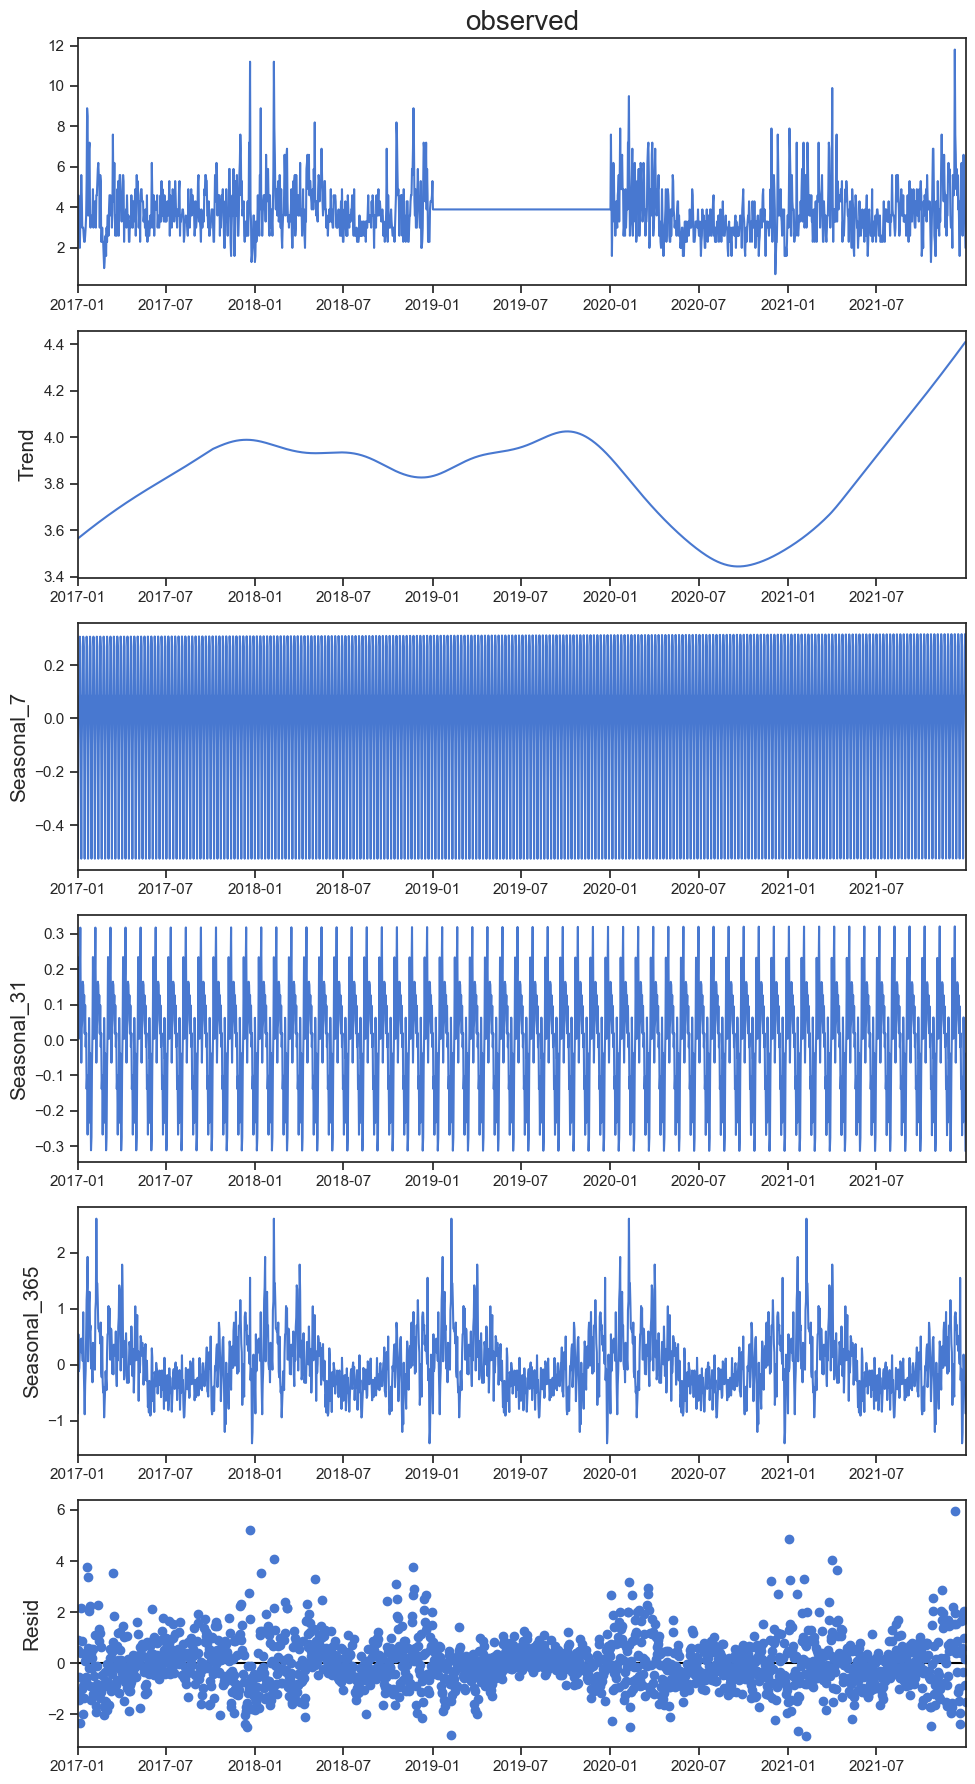

In [25]:
#Decomposing to trend, seasonal and residual components
from statsmodels.tsa.seasonal import MSTL

#Decomposing
mstl = MSTL(no2_stations['DsSniezkaObs_first_impute'], 
            periods=(7, 31, 365), #Weekly, monthly, and yearly seasonality
            windows=[1001, 501, 101],
            stl_kwargs={
                "seasonal_deg":0, # Means the seasonal smoother is fit with a moving average.
               }
           )

res=mstl.fit()

fig = res.plot()
fig.set_size_inches((10, 18))
fig.tight_layout()

In [26]:
#Filter only those rows that contains missing values
#Then for those rows in DsSniezkaObs that contains null values, take the corresponding rows from both 
#extracted seasonal and trend components and add all of them. 

no2_stations['DsSniezkaObs_impute_final'] = no2_stations['DsSniezkaObs']

null_values = no2_stations['DsSniezkaObs'].isna()

no2_stations['DsSniezkaObs_impute_final'].loc[null_values] = \
res.seasonal.loc[null_values].sum(axis=1) + res.trend.loc[null_values] - res.resid.loc[null_values]

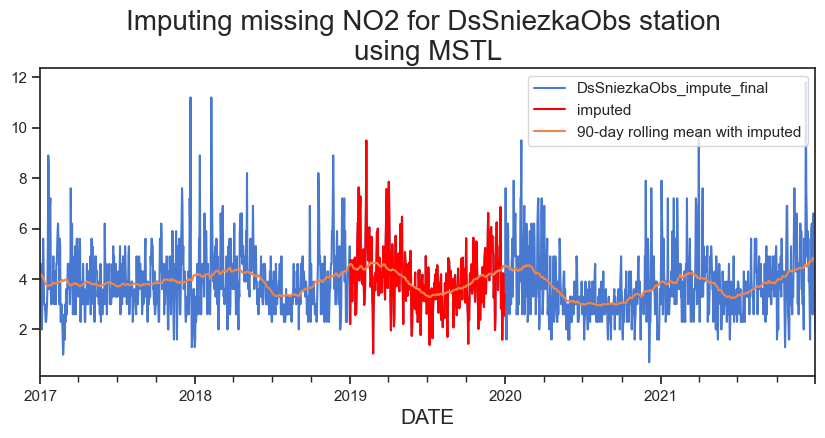

In [27]:
ax = no2_stations['DsSniezkaObs_impute_final'].plot()

no2_stations.loc[null_values, 'DsSniezkaObs_impute_final'].\
    plot(c='red', ax=ax, label='imputed', figsize=(10, 4))

no2_stations['DsSniezkaObs_impute_final'].rolling(90, center=True, min_periods=30).mean().\
    plot(ax=ax, label='90-day rolling mean with imputed')

ax.legend()
ax.set_title("Imputing missing NO2 for DsSniezkaObs station \nusing MSTL");

In [28]:
pattern = re.compile(r'_imputed$|_impute_final$')
no2_stations=\
no2_stations[[col for col in no2_stations.columns if re.search(pattern, col)]]

In [29]:
no2_stations.isna().sum()

POLSTID
LbJarczWolaM_imputed         0
PmLebaRabkaE_imputed         0
DsSniezkaObs_impute_final    0
dtype: int64

In [30]:
no2_stations.columns = [col.split("_")[0] for col in no2_stations.columns]

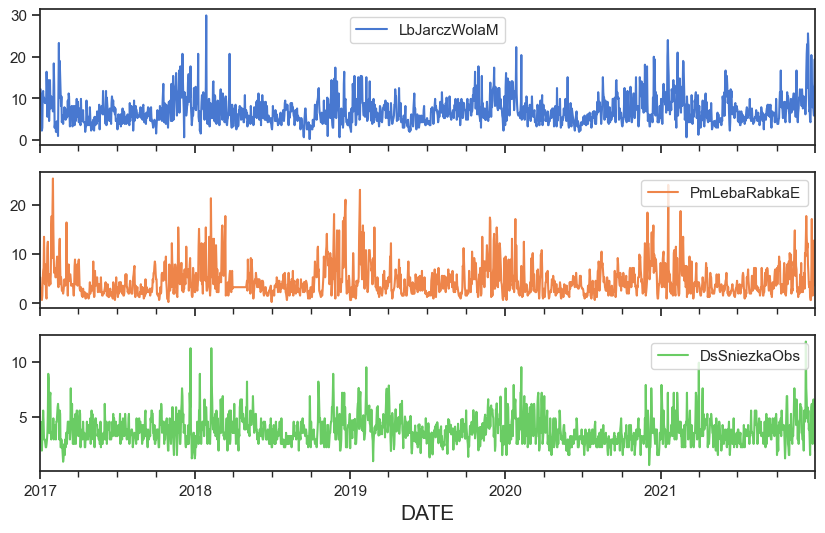

In [31]:
no2_stations.plot(subplots=True, figsize=(10, 6));

# Creating station name prefix

In [32]:
df['station_name_prefix'] = \
df['POLSTID'].str.extract(r'(^[A-Z][a-z][A-Z]+[a-z]+)\d*[A-Z]*.*$', expand=False)

In [33]:
#Creating a df with a list of the prefix and corresponding stations
station_groups=\
df[['POLSTID', 'station_name_prefix']].drop_duplicates().sort_values(['station_name_prefix', 'POLSTID'])

In [45]:
#Creating list of prefix with multiple stations
mul_stations=\
station_groups.groupby(['station_name_prefix']).size()\
[station_groups.groupby(['station_name_prefix']).size()!=1].index

station_groups.loc[station_groups['station_name_prefix'].isin(mul_stations)]

POLSTID station_name_prefix
4        DsJelGorOgin               DsJel
5        DsJelGorSoko               DsJel
10       DsLegAlRzecz               DsLeg
11       DsLegPolarna               DsLeg
12         DsLubanMOB             DsLuban
..                ...                 ...
291      ZpSzczAndr01              ZpSzcz
292  ZpSzczBudzWosMOB              ZpSzcz
293      ZpSzczPils02              ZpSzcz
294      ZpSzczec1Maj            ZpSzczec
295      ZpSzczecPrze            ZpSzczec

[110 rows x 2 columns]

# O3 Stations

In [36]:
o3_stations=\
df.loc[~df['POLSTID'].isin(o3_null_stations)].\
    groupby(['POLSTID', 'DATE'])['O3_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID')

o3_stations.index.freq='D'

In [37]:
o3_stations = o3_stations[np.sort(o3_stations.columns)]

In [38]:
# o3_stations['year'] = o3_stations.index.year

In [39]:
o3_high_incomplete = o3_stations.isnull().sum()[o3_stations.isnull().sum()>=364].sort_index().index
o3_mid_incomplete = o3_stations.isnull().sum()[o3_stations.isnull().sum().between(31, 363)].index
o3_low_incomplete = o3_stations.isnull().sum()[o3_stations.isnull().sum().between(1, 30)].index

In [40]:
#Imputing stations with less than 14 null values

o3_stations[o3_low_incomplete]=\
o3_stations[o3_low_incomplete].interpolate('linear', limit_direction='both')

  0%|          | 0/16 [00:00<?, ?it/s]

Imputing KpKoniczynka


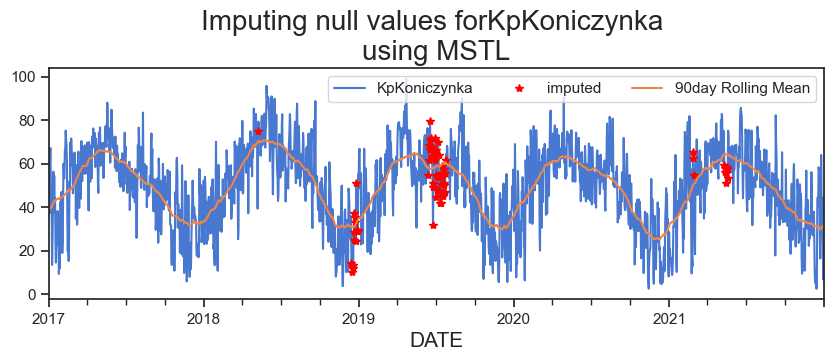


Imputing KpToruDziewu


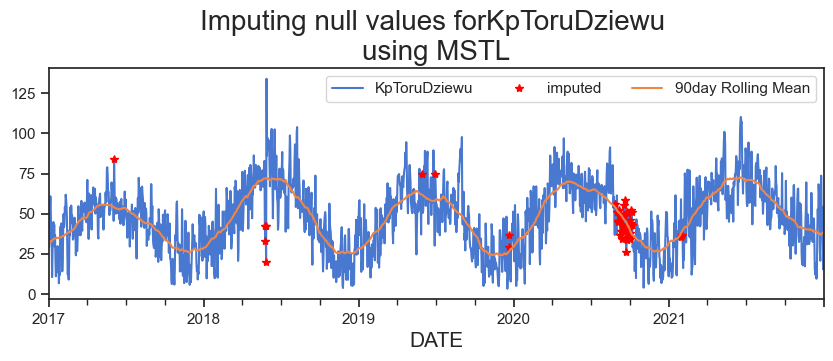


Imputing LuGorzKosGdy


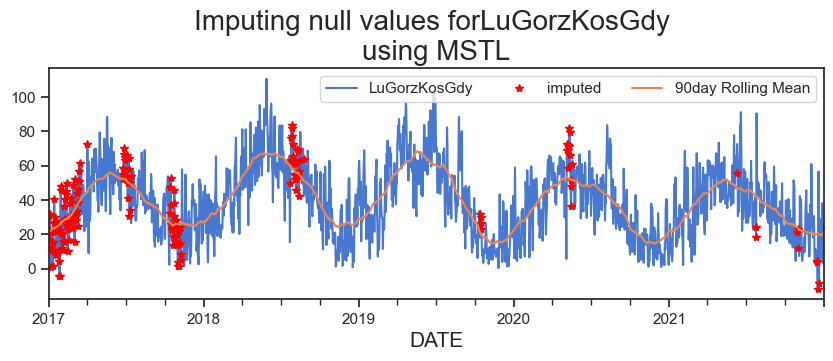


Imputing LuSmolBytnic


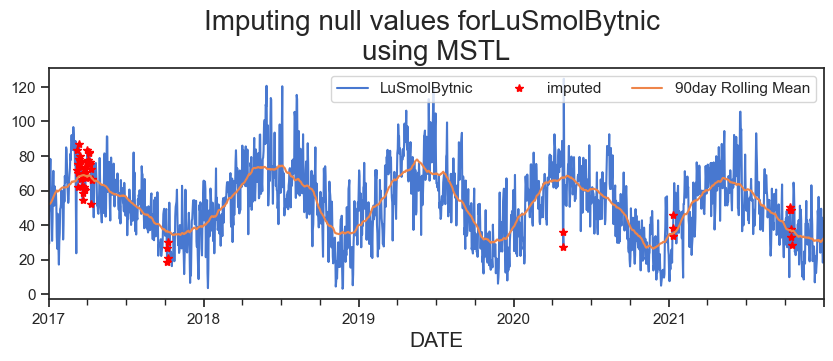


Imputing LuSulecDudka


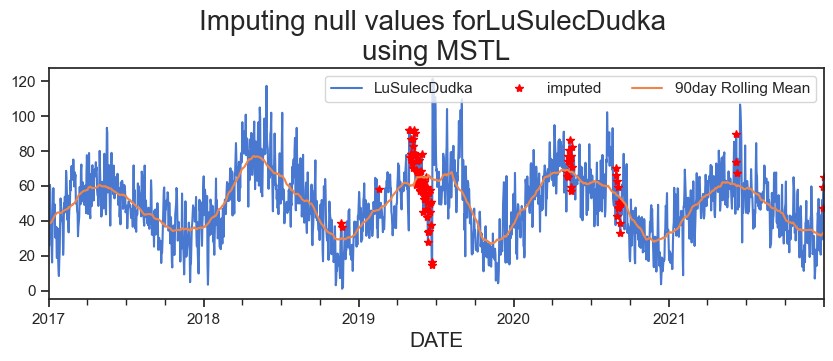


Imputing LuWsKaziWiel


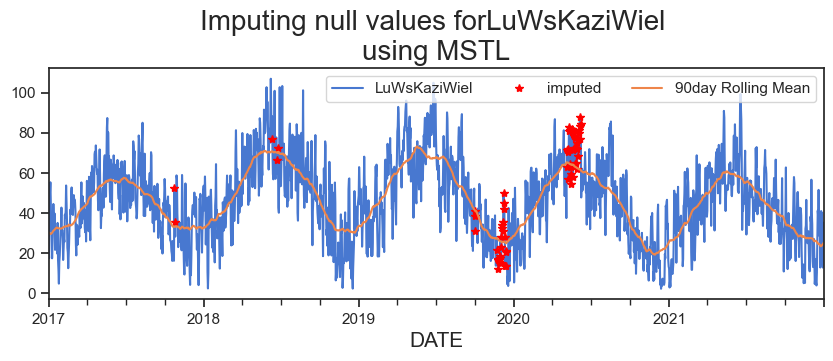


Imputing LuZielKrotka


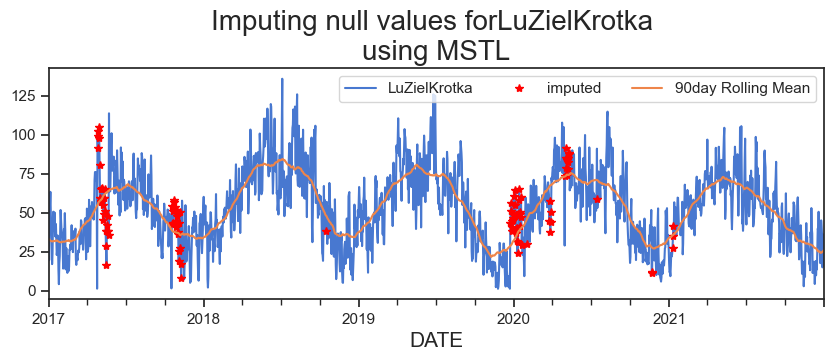


Imputing MpSzymbaGorl


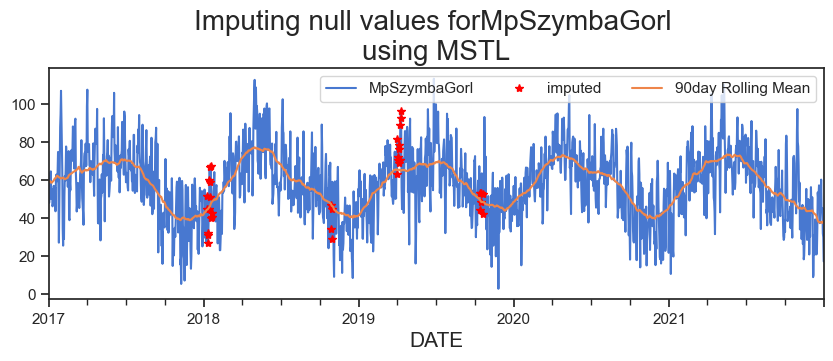


Imputing OpKKozBSmial


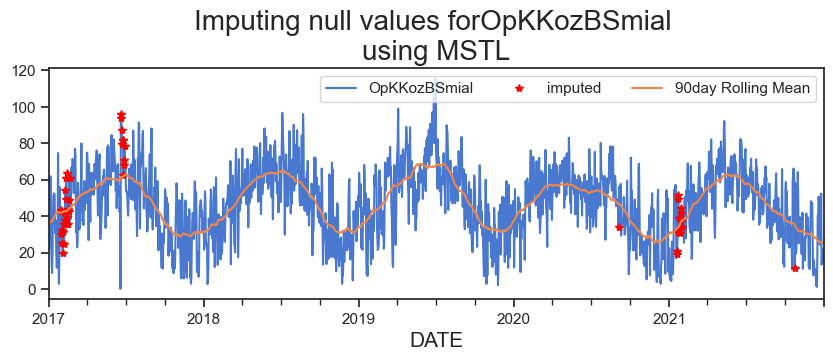


Imputing OpOlesSlowac


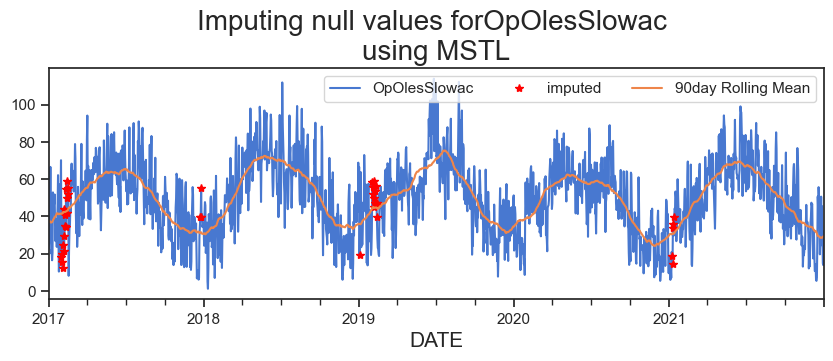


Imputing PdBorsukowiz


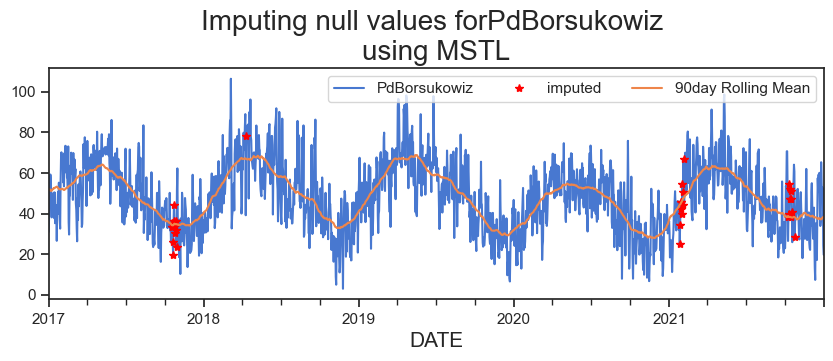


Imputing PmGdaLeczk08


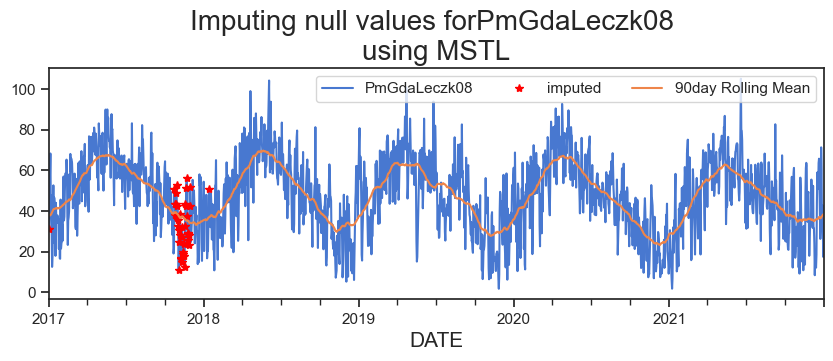


Imputing PmLebMalcz16


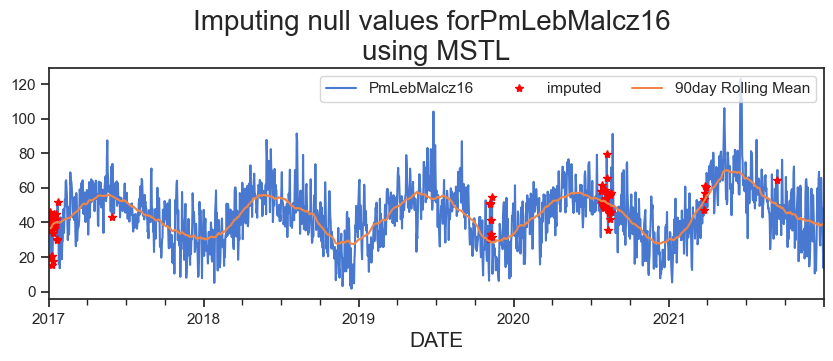


Imputing PmLinieKos17


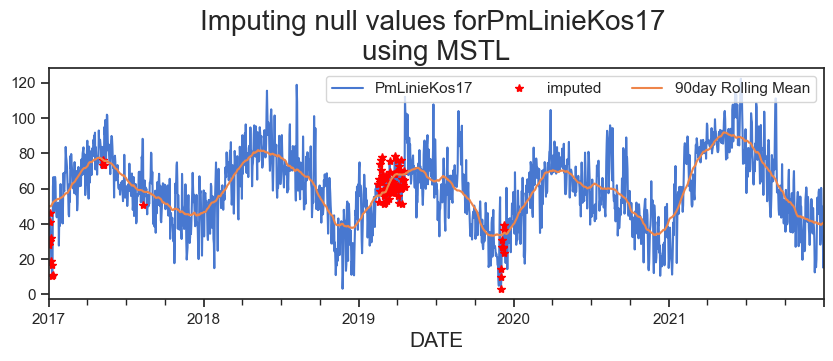


Imputing PmMalMicki15


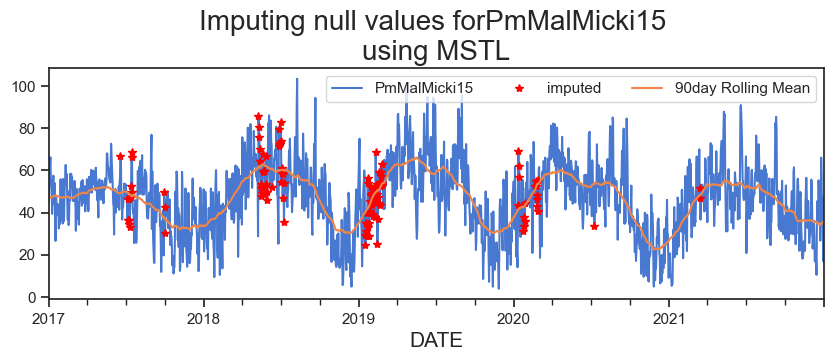


Imputing WpKoniWyszyn


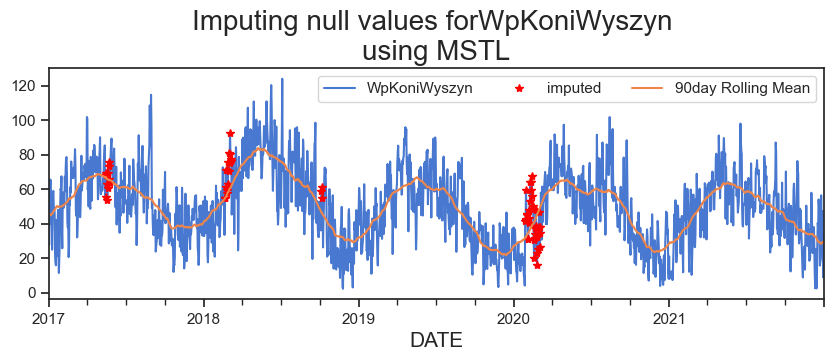


Wall time: 48.5 s


In [41]:
%%time
#Imputing stations between 15 and 363 null values using MSTL
for col in tqdm(o3_mid_incomplete):
    
    print(f"Imputing {col}")
    null_values = o3_stations[col].isna()
    
    temp_df = o3_stations[col].interpolate('linear', limit_direction='both')
    
    mstl = MSTL(temp_df, 
            periods=(7, 31, 365), #Weekly, monthly, and yearly seasonality
            windows=[1001, 501, 101],
            stl_kwargs={
                "seasonal_deg":0, # Means the seasonal smoother is fit with a moving average.
               }
           )

    res=mstl.fit()
    
    temp_df.loc[null_values] = \
    res.seasonal.loc[null_values].sum(axis=1) + res.trend.loc[null_values] - res.resid.loc[null_values]
    
    o3_stations[col] = temp_df
    
    #Plot   
    ax = temp_df.plot(figsize=(10, 3))
    
    temp_df.loc[null_values].plot(linestyle='', marker='*', c='red', ax=ax, label='imputed')

    temp_df.rolling(90, center=True, min_periods=30).mean().plot(ax=ax, label='90day Rolling Mean')

    ax.legend(ncol=3, loc='upper right')
    ax.set_title(f"Imputing null values for{col} \nusing MSTL");
    
    plt.show();
    
    print()

# Trying to Merge similar stations - In Progress

In [42]:
mul_o3_stn_high_null_df = \
station_groups.loc[
    station_groups['station_name_prefix'].isin(mul_stations) &
    station_groups['POLSTID'].isin(o3_high_incomplete)
]

mul_o3_stn_high_null_abbrev_list=\
mul_o3_stn_high_null_df.groupby('station_name_prefix').size()\
[mul_o3_stn_high_null_df.groupby('station_name_prefix').size()>1].index

mul_o3_stn_high_null_abbrev_list

Index(['DsLuban', 'KpWlocl', 'MzWar', 'PdBial', 'SkKiel', 'SlDabro'], dtype='object', name='station_name_prefix')

In [43]:
o3_high_null_mul_stns_list=\
set(o3_high_incomplete).intersection(
    set(
        station_groups.loc[
            station_groups['station_name_prefix'].isin(mul_o3_stn_high_null_abbrev_list), 'POLSTID'
        ]
    )
)

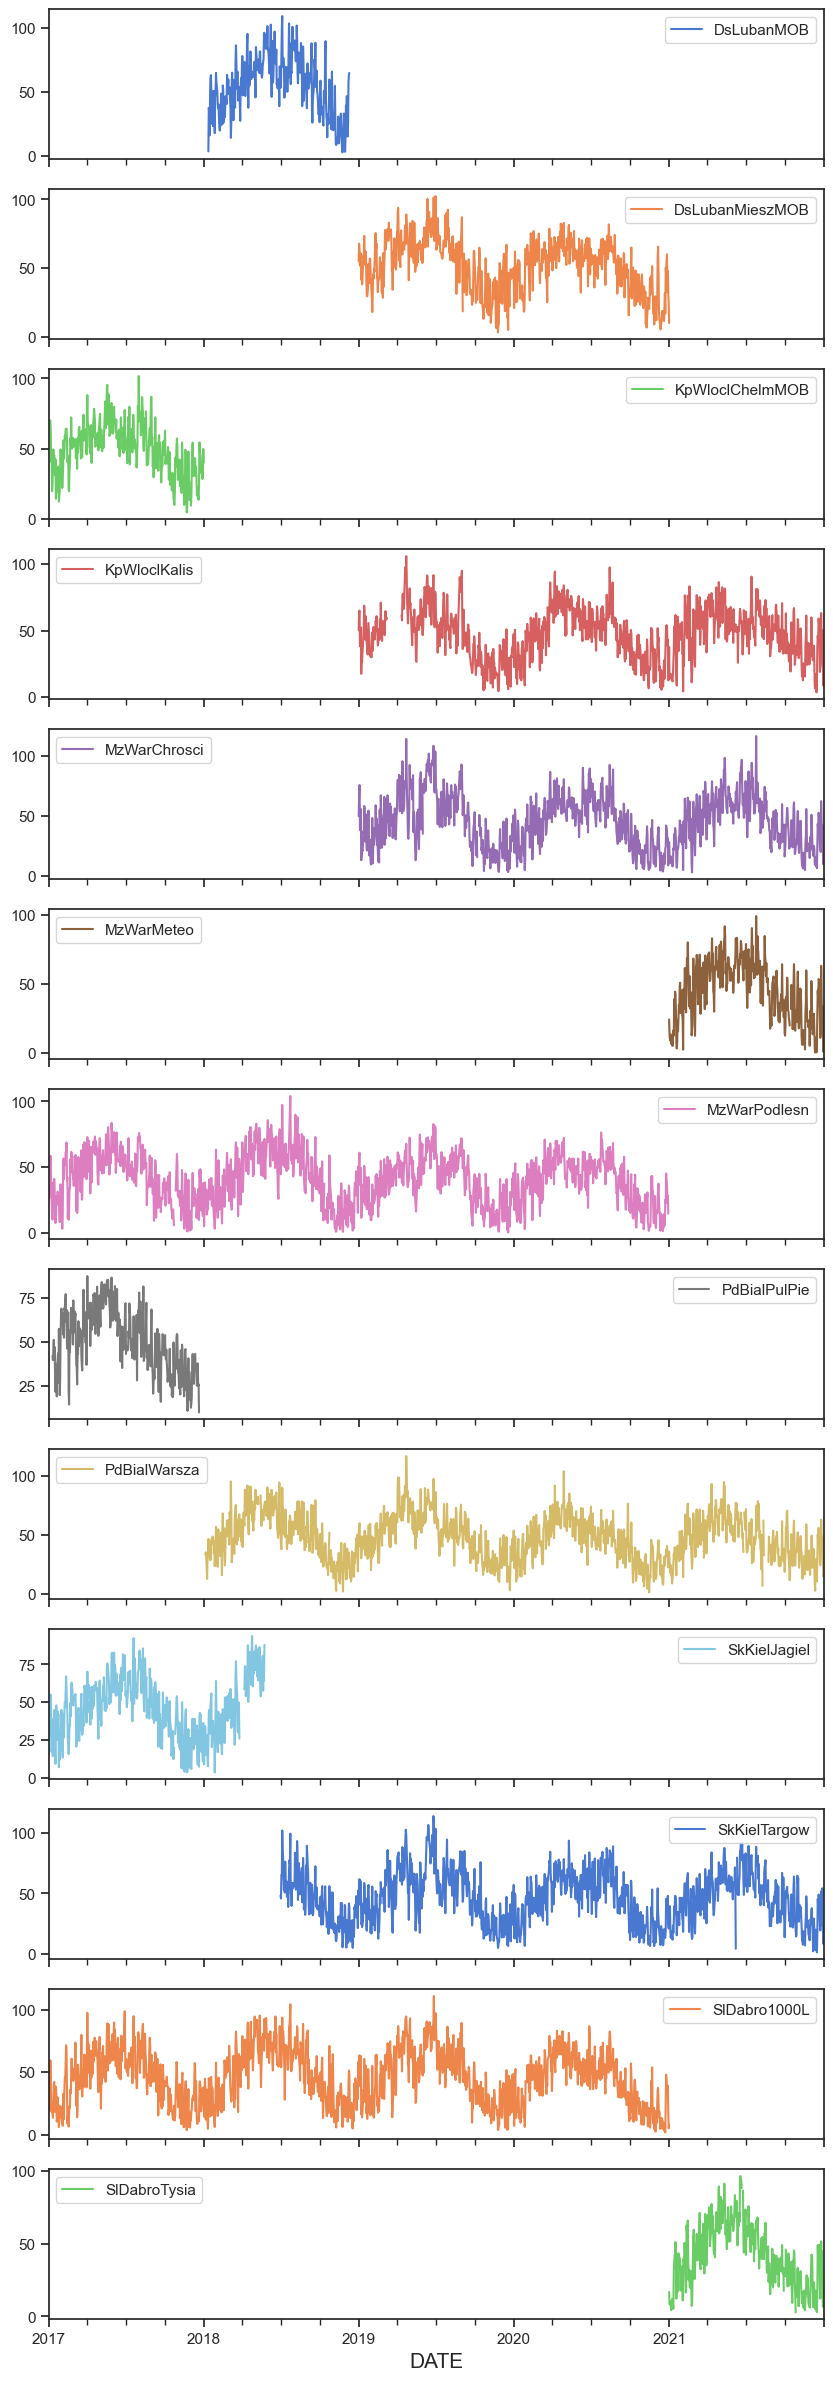

In [44]:
o3_stations[np.sort(list(o3_high_null_mul_stns_list))].plot(subplots=True, figsize=(10, 30));